# 各种流变模型的模拟数据生成

## 生成幂律模型的应力应变数据
$$\sigma=K\gamma^n$$


+ 导包

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

+ 定义公共对象

In [ ]:
# 创建Excel写入器
writer = pd.ExcelWriter('power_law_data.xlsx', engine='xlsxwriter')
# 获取xlsxwriter工作簿和工作表对象
workbook = writer.book
# 定义格式
format1 = workbook.add_format({'num_format': '0.000000000000000'})

In [ ]:
# 参数
K = 1.0  # 材料常数
n_values = [0.3, 0.5, 1.0, 1.5, 2.0]  # 幂律指数列表
epsilon_max = 100  # 最大应变
num_points = 10000   # 数据点数量

# 生成应变数据
epsilon = np.linspace(0, epsilon_max, num_points)
# 获取当前Jupyter Notebook文件的绝对路径

# 绘制应力-应变曲线
plt.figure(figsize=(10, 6))

for n in n_values:
    # 根据幂律模型生成应力数据
    sigma = K * epsilon**n
    # 创建DataFrame
    data = pd.DataFrame({'Strain (γ)': epsilon, 'Stress (σ)': sigma})
    
    # 将数据写入Excel文件的不同工作簿
    data.to_excel(writer, sheet_name=f'n={n}', index=False, float_format='%.15f')
    
    # 绘制曲线
    plt.plot(epsilon, sigma, label=f'n = {n}', linewidth=2)

# 保存Excel文件
writer.close()

plt.xlabel('Strain (γ)')
plt.ylabel('Stress (σ)')
plt.title('Stress-Strain Curves for Different Power Law Indices')
plt.legend()
plt.grid(True)
plt.show()

## 生成宾汉塑性流体模型
$$\sigma=\sigma_0+K\gamma^n$$

In [ ]:
# 参数
K = 1.0  # 材料常数
n_values = [0.2, 0.6, 1.0, 1.4, 1.8]  # 幂律指数列表
epsilon_max = 100  # 最大应变
num_points = 10000   # 数据点数量
sigma0=1
# 生成应变数据
epsilon = np.linspace(0, epsilon_max, num_points)

# 创建Excel写入器
writer = pd.ExcelWriter('bingham_data.xlsx', engine='xlsxwriter')

# 绘制应力-应变曲线
plt.figure(figsize=(10, 6))

for n in n_values:
    # 根据幂律模型生成应力数据
    sigma = sigma0+K * epsilon**n
    
    # 创建DataFrame
    data = pd.DataFrame({'Strain (γ)': epsilon, 'Stress (σ)': sigma})
    
    # 将数据写入Excel文件的不同工作簿
    data.to_excel(writer, sheet_name=f'n={n}', index=False, float_format='%.15f')
    
    # 绘制曲线
    plt.plot(epsilon, sigma, label=f'n = {n}', linewidth=2)

# 保存Excel文件
writer.close()

plt.xlabel('Strain (γ)')
plt.ylabel('Stress (σ)')
plt.title('Stress-Strain Curves for Different Power Law Indices')
plt.legend()
plt.grid(True)
plt.show()

+ 测试一下数据的精度

In [ ]:
# 读取Excel文件
file_path = 'bingham_data.xlsx'
df = pd.read_excel(file_path, sheet_name=0)  # 读取第一个工作簿

# 打印前10行数据
print(df.head(10))

## 简单MaxWell模型

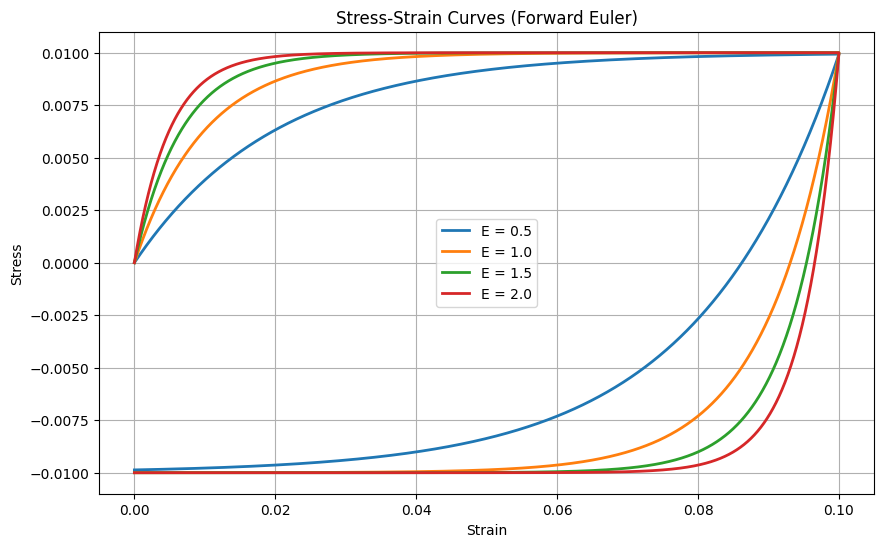

In [27]:
# 定义 calc_stress 函数
def calc_stress(E, eta, max_strain, strain_rate, N):
    time = np.linspace(0, 2 * max_strain / strain_rate, N)
    strain = np.zeros(N)
    for i in range(N):
        if time[i] < max_strain / strain_rate:
            strain[i] = strain_rate * time[i]
        else:
            strain[i] = max_strain - (time[i] - max_strain / strain_rate) * strain_rate
    
    stress = np.zeros(N)
    for i in range(1, N):
        de = strain[i] - strain[i-1]
        dt = time[i] - time[i-1]
        stress[i] = (1 - dt / (eta / E)) * stress[i-1] + E * de
    
    return time, strain, stress

# 参数
E_values = [0.5, 1.0, 1.5, 2.0]  # 弹性模量列表
eta = 1.0  # 粘性系数
max_strain = 0.1  # 最大应变
strain_rate = 0.01  # 应变率
N = 10000  # 时间步数

# 创建Excel写入器
writer = pd.ExcelWriter('simple_maxwell_data.xlsx', engine='xlsxwriter')

# 绘制应力-应变曲线
plt.figure(figsize=(10, 6))

for E in E_values:
    # 计算应力-应变数据
    time, strain, stress = calc_stress(E, eta, max_strain, strain_rate, N)
    
    # 创建DataFrame
    data = pd.DataFrame({'Strain': strain, 'Stress': stress})
    
    # 将数据写入Excel文件的不同工作簿
    data.to_excel(writer, sheet_name=f'E={E}', index=False)
    
    # 绘制曲线
    plt.plot(strain, stress, label=f'E = {E}', linewidth=2)

# 保存Excel文件
writer.close()

plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('Stress-Strain Curves (Forward Euler)')
plt.legend()
plt.grid(True)
plt.savefig("Forward_Euler.png")
plt.show()

In [ ]:
# 读取Excel文件
file_path = 'simple_maxwell_data.xlsx'
df = pd.read_excel(file_path, sheet_name=0)  # 读取第一个工作簿

# 打印前10行数据
print(df.head(10))

       Strain    Stress
9990  0.00018 -0.009865
9991  0.00016 -0.009865
9992  0.00014 -0.009865
9993  0.00012 -0.009865
9994  0.00010 -0.009865
9995  0.00008 -0.009865
9996  0.00006 -0.009866
9997  0.00004 -0.009866
9998  0.00002 -0.009866
9999  0.00000 -0.009866


# 交变应力MaxWell模型

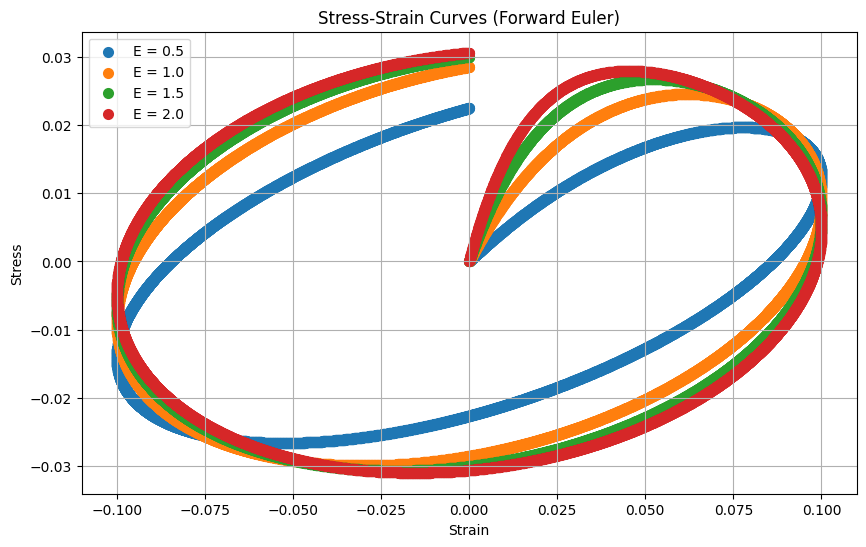

In [13]:
# 定义 calc_stress 函数
def calc_stress(E, eta, epsilon_0, omega, N, T):
    time = np.linspace(0, T, N)
    strain = epsilon_0 * np.sin(omega * time)
    
    stress = np.zeros(N)
    for i in range(1, N):
        de = strain[i] - strain[i-1]
        dt = time[i] - time[i-1]
        stress[i] =(1 - dt / (eta / E)) * stress[i-1] + E * de
    
    return time, strain, stress

# 参数
E_values = [0.5,1.0,1.5,2.0]  # 弹性模量列表
eta = 0.1  # 粘性系数
epsilon_0 = 0.1  # 最大应变
omega = np.pi  # 角频率
T = 2 * np.pi / omega  # 周期
N = 10000  # 时间步数

# 创建Excel写入器
writer = pd.ExcelWriter('sin_maxwell_data.xlsx', engine='xlsxwriter')

# 绘制应力-应变曲线
plt.figure(figsize=(10, 6))

for E in E_values:
    # 计算应力-应变数据
    time, strain, stress = calc_stress(E, eta, epsilon_0, omega, N, T)
    
    # 创建DataFrame
    data = pd.DataFrame({'Time': time, 'Strain': strain, 'Stress': stress})
    
    # 将数据写入Excel文件的不同工作簿
    data.to_excel(writer, sheet_name=f'E={E}', index=False)
    
    # 绘制曲线
    plt.scatter(strain, stress, label=f'E = {E}', linewidth=2)

# 保存Excel文件
writer.close()

plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('Stress-Strain Curves (Forward Euler)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# 读取Excel文件
file_path = 'sin_maxwell_data.xlsx'
df = pd.read_excel(file_path, sheet_name=0)  # 读取第一个工作簿

# 打印前10行数据
print(df.head(10))

     Time    Strain    Stress
0  0.0000  0.000000  0.000000
1  0.0002  0.000063  0.000031
2  0.0004  0.000126  0.000063
3  0.0006  0.000189  0.000094
4  0.0008  0.000251  0.000125
5  0.0010  0.000314  0.000157
6  0.0012  0.000377  0.000188
7  0.0014  0.000440  0.000219
8  0.0016  0.000503  0.000250
9  0.0018  0.000566  0.000282


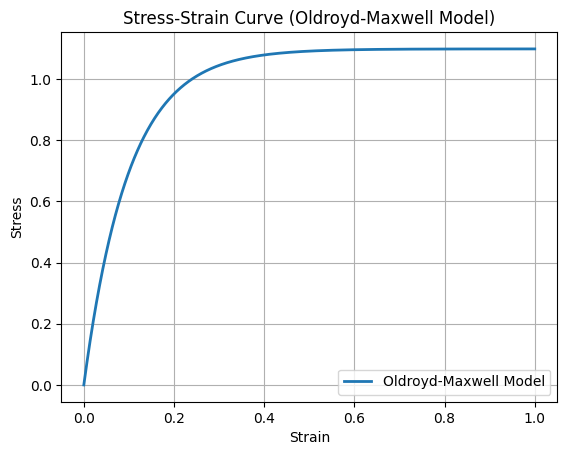

In [14]:
# 定义 calc_stress 函数
def calc_stress(eta, lambda1, lambda2, gamma_rate, N, T):
    time = np.linspace(0, T, N)
    strain = gamma_rate * time
    
    stress = np.zeros(N)
    for i in range(1, N):
        dt = time[i] - time[i-1]
        dgamma = gamma_rate * dt
        stress[i] = (1 - dt / lambda1) * stress[i-1] + eta * (dgamma + lambda2 * dgamma / dt)
    
    return time, strain, stress

# 参数
eta = 1.0  # 粘性系数
lambda1 = 1.0  # 松弛时间1
lambda2 = 0.1  # 松弛时间2
gamma_rate = 0.1  # 剪切率
T = 10.0  # 总时间
N = 1000  # 时间步数

# 计算应力-应变数据
time, strain, stress = calc_stress(eta, lambda1, lambda2, gamma_rate, N, T)

# 绘制应力-应变曲线
plt.plot(strain, stress, label="Oldroyd-Maxwell Model", linewidth=2)
plt.xlabel('Strain')
plt.ylabel('Stress')
plt.title('Stress-Strain Curve (Oldroyd-Maxwell Model)')
plt.legend()
plt.grid(True)
plt.show()

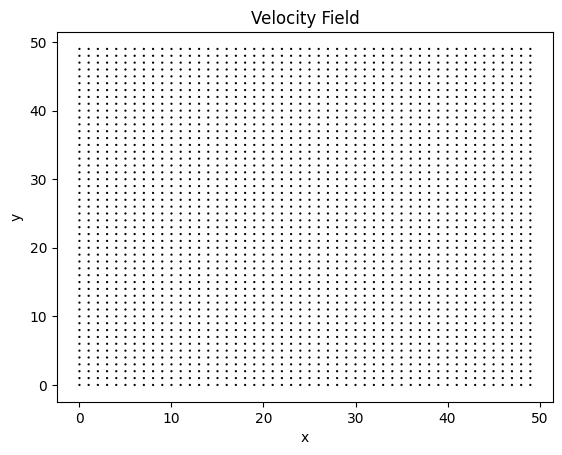

In [26]:
# 参数设置
nx = 50  # x 方向网格数
ny = 50  # y 方向网格数
lx = 1.0  # x 方向长度
ly = 1.0  # y 方向长度
nu = 0.1  # 运动粘度
mu = 0.5  # 弹性模量
lambda1 = 0.1  # 第一松弛时间
lambda2 = 0.1  # 第二松弛时间
dt = 0.001  # 时间步长
T = 1.0  # 总模拟时间
nt = int(T / dt)  # 总时间步数

# 初始化变量
u = np.zeros((nx, ny))  # x 方向速度
v = np.zeros((nx, ny))  # y 方向速度
p = np.zeros((nx, ny))  # 压力
tau_xx = np.zeros((nx, ny))  # xx 方向应力
tau_xy = np.zeros((nx, ny))  # xy 方向应力
tau_yy = np.zeros((nx, ny))  # yy 方向应力

# 边界条件
def apply_boundary_conditions(u, v, tau_xx, tau_xy, tau_yy):
    u[0, :] = 0
    u[-1, :] = 0
    v[0, :] = 0
    v[-1, :] = 0
    tau_xx[0, :] = 0
    tau_xx[-1, :] = 0
    tau_xy[0, :] = 0
    tau_xy[-1, :] = 0
    tau_yy[0, :] = 0
    tau_yy[-1, :] = 0
    return u, v, tau_xx, tau_xy, tau_yy

# 计算梯度
def compute_gradients(u, v):
    dudx = np.zeros_like(u)
    dudy = np.zeros_like(u)
    dvdx = np.zeros_like(v)
    dvdy = np.zeros_like(v)
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            dudx[i, j] = (u[i + 1, j] - u[i - 1, j]) / (2 * lx / nx)
            dudy[i, j] = (u[i, j + 1] - u[i, j - 1]) / (2 * ly / ny)
            dvdx[i, j] = (v[i + 1, j] - v[i - 1, j]) / (2 * lx / nx)
            dvdy[i, j] = (v[i, j + 1] - v[i, j - 1]) / (2 * ly / ny)
    return dudx, dudy, dvdx, dvdy

# 主循环
for n in range(nt):
    # 计算梯度
    dudx, dudy, dvdx, dvdy = compute_gradients(u, v)

    # 更新应力张量
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            tau_xx[i, j] += dt * (
                    2 * nu * (dudx[i, j] + dvdy[i, j]) - (lambda1 + lambda2) * tau_xx[i, j] + lambda2 * tau_xx[i, j])
            tau_xy[i, j] += dt * (
                    nu * (dudy[i, j] + dvdx[i, j]) - lambda1 * tau_xy[i, j] + lambda2 * tau_xy[i, j])
            tau_yy[i, j] += dt * (
                    2 * nu * (dvdx[i, j] + dudy[i, j]) - (lambda1 + lambda2) * tau_yy[i, j] + lambda2 * tau_yy[i, j])

    # 更新速度场
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u[i, j] += dt * (
                    -u[i, j] * dudx[i, j] - v[i, j] * dudy[i, j] + nu * (
                    (dudx[i + 1, j] - dudx[i - 1, j]) / (2 * lx / nx) + (
                    dudy[i, j + 1] - dudy[i, j - 1]) / (2 * ly / ny)) - (
                    1 / mu) * (tau_xx[i + 1, j] - tau_xx[i - 1, j]) / (2 * lx / nx) - (
                    1 / mu) * (tau_xy[i, j + 1] - tau_xy[i, j - 1]) / (2 * ly / ny))
            v[i, j] += dt * (
                    -u[i, j] * dvdx[i, j] - v[i, j] * dvdy[i, j] + nu * (
                    (dvdx[i + 1, j] - dvdx[i - 1, j]) / (2 * lx / nx) + (
                    dvdy[i, j + 1] - dvdy[i, j - 1]) / (2 * ly / ny)) - (
                    1 / mu) * (tau_xy[i + 1, j] - tau_xy[i - 1, j]) / (2 * lx / nx) - (
                    1 / mu) * (tau_yy[i, j + 1] - tau_yy[i, j - 1]) / (2 * ly / ny))

    # 应用边界条件
    u, v, tau_xx, tau_xy, tau_yy = apply_boundary_conditions(u, v, tau_xx, tau_xy, tau_yy)

# 可视化结果
plt.figure()
epsilon = 1e-10
u[u == 0] = epsilon
v[v == 0] = epsilon

# 绘制矢量场
plt.quiver(u, v, scale=100, width=0.005)
plt.title('Velocity Field')
plt.xlabel('x')
plt.ylabel('y')
plt.show()